In [20]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import seaborn as sns

In [21]:
#The data of all workers working on machine 5 only. It is taken to show a gimpse of data
TotalData=pd.read_excel('machine 5.xlsx')

In [22]:
TotalData.drop(columns=['Unnamed: 3'],inplace=True)

In [23]:
# description of total data for one machine (machine 5)
TotalData

,No,Date,Machine,work,state,stop(planned),run,error,dummy,worker_not_exist,...,Type_ID,CodeAW,codeAX,CodeAY,CodeAZ,codeBA,CodeBB,CodeBC,codeBD,CodeBE
0,OEE_5,2019-07-28 08:31:00,No5,NaN,stop(planned),1,0,0,0,1,...,201907280827_5,0,0,0,1,0,0,0,1,1
1,OEE_5,2019-07-28 08:32:00,No5,NaN,stop(planned),1,0,0,0,0,...,201907280827_5,0,0,0,1,0,0,0,1,1
2,OEE_5,2019-07-28 08:33:00,No5,NaN,stop(planned),1,0,0,0,0,...,201907280827_5,0,0,0,1,0,0,0,1,1
3,OEE_5,2019-07-28 08:34:00,No5,NaN,stop(planned),1,0,0,0,0,...,201907280827_5,0,0,0,1,0,0,0,1,1
4,OEE_5,2019-07-28 08:35:00,No5,NaN,stop(planned),1,0,0,0,0,...,201907280827_5,0,0,0,1,0,0,0,1,1
5,OEE_5,2019-07-28 08:36:00,No5,NaN,stop(planned),1,0,0,0,0,...,201907280827_5,0,0,0,1,0,0,0,1,1
6,OEE_5,2019-07-28 08:37:00,No5,NaN,stop(planned),1,0,0,0,0,...,201907280827_5,0,0,0,1,0,0,0,1,1
7,OEE_5,2019-07-28 08:38:00,No5,NaN,stop(planned),1,0,0,0,0,...,201907280827_5,0,0,0,1,0,0,0,1,1
8,OEE_5,2019-07-28 08:39:00,No5,NaN,stop(planned),1,0,0,0,0,...,201907280827_5,0,0,0,1,0,0,0,1,1
9,OEE_5,2019-07-28 08:40:00,No5,NaN,stop(planned),1,0,0,0,0,...,201907280827_5,0,0,0,1,0,0,0,1,1


In [24]:
# Data vsualization
# one of the way to analyze work pattern is to draw man machine chart
#Man machine chart shows the position of a worker/ Type of operation  around machine at different machine condition.
#  Here man machine chart for two workers(id:028 nad id: 054) on two different day(july 27th and 28th 2019) will be anlyzed as example
df_28=pd.read_excel('July28-29.xlsx','Sheet2') #worker 028 on 28th July
df_28['Date'] = pd.Series([val.time() for val in df_28['Date']]) # removing the date part from timedate data
cols=['Date','state','machineInfo']
x1= df_28.loc[:, cols].values
df_W28=pd.DataFrame(data = x1, columns = cols)
df_W28.set_index('Date',inplace=True)


In [25]:
df_27_s028=pd.read_excel('July28-29.xlsx','July 27-28s028')#worker 028 on 27th July
df_27_s028['Date'] = pd.Series([val.time() for val in df_27_s028['Date']])
y1= df_27_s028.loc[:, cols].values
df_27_W28=pd.DataFrame(data = y1, columns = cols)
df_27_W28.set_index('Date',inplace=True)

In [26]:
df_27_s054=pd.read_excel('July28-29.xlsx','July 27-28s054') #worker 054 on 27th July
df_27_s054['Date'] = pd.Series([val.time() for val in df_27_s054['Date']])
z1= df_27_s054.loc[:, cols].values
df_27_W54=pd.DataFrame(data = x1, columns = cols)
df_27_W54.set_index('Date',inplace=True)

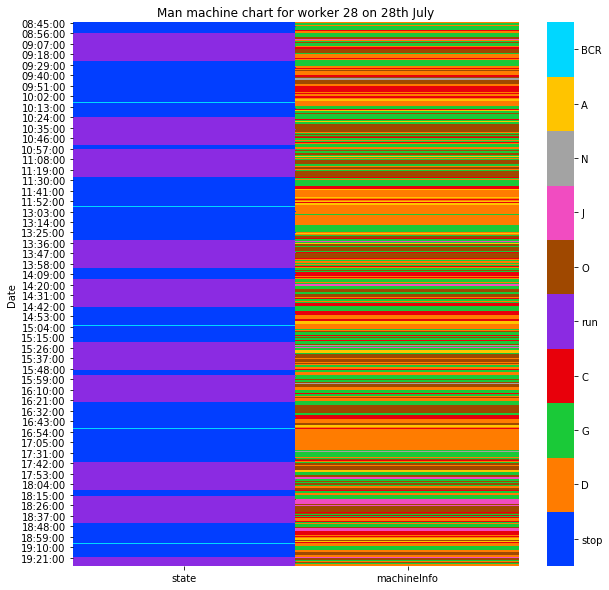

In [28]:
# Man machine chart for worker 028 on 28th July
fig, ax = plt.subplots(figsize=(10,10)) 
value_to_int = {j:i for i,j in enumerate(pd.unique(df_W28.values.ravel()))}
n = len(value_to_int)     
# discrete colormap (n samples from a given cmap)
cmap = sns.color_palette("bright", n) 
ax = sns.heatmap(df_W28.replace(value_to_int), cmap=cmap) 
# modify colorbar:
colorbar = ax.collections[0].colorbar 
r = colorbar.vmax - colorbar.vmin 
colorbar.set_ticks([colorbar.vmin + r / n * (0.5 + i) for i in range(n)])
colorbar.set_ticklabels(list(value_to_int.keys()))
ax.set_title('Man machine chart for worker 28 on 28th July')
plt.show()

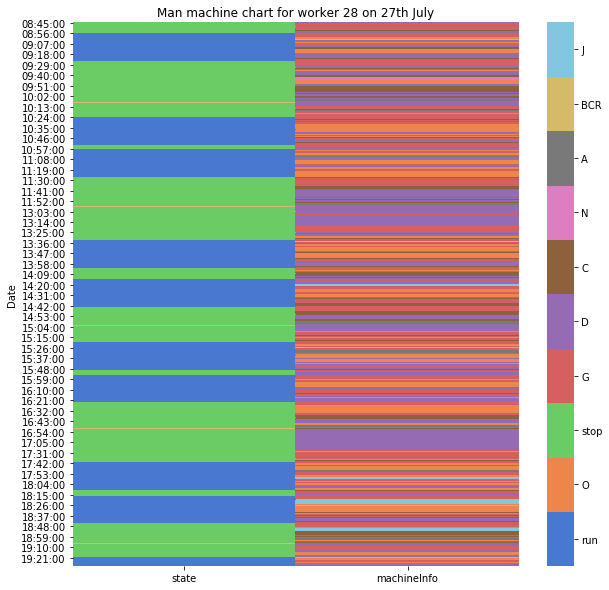

In [29]:
# Man machine chart for worker 028 on 27th July
fig, ax = plt.subplots(figsize=(10,10)) 
value_to_int = {j:i for i,j in enumerate(pd.unique(df_27_W28.values.ravel()))}
n = len(value_to_int)     
cmap = sns.color_palette("muted", n) 
ax = sns.heatmap(df_W28.replace(value_to_int), cmap=cmap) 
colorbar = ax.collections[0].colorbar 
r = colorbar.vmax - colorbar.vmin 
colorbar.set_ticks([colorbar.vmin + r / n * (0.5 + i) for i in range(n)])
colorbar.set_ticklabels(list(value_to_int.keys()))  
ax.set_title('Man machine chart for worker 28 on 27th July')
plt.show()

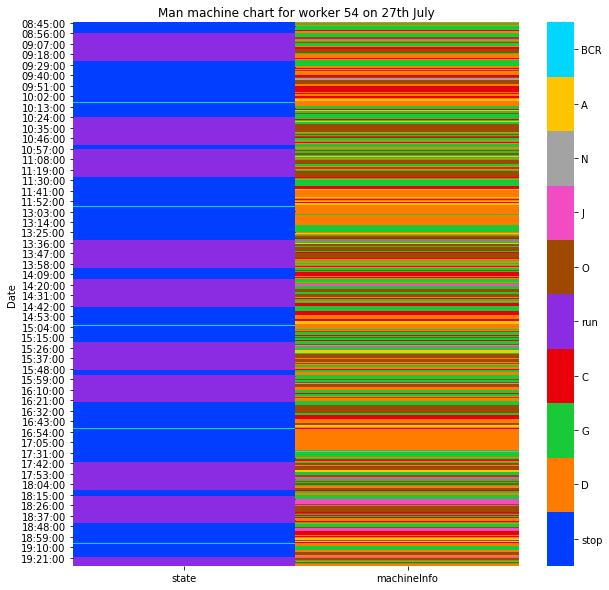

In [30]:
 #Man machine chart for worker 054 on 27th July
fig, ax = plt.subplots(figsize=(10,10)) 
value_to_int = {j:i for i,j in enumerate(pd.unique(df_27_W54.values.ravel()))}
n = len(value_to_int)     
cmap = sns.color_palette("bright", n) 
ax = sns.heatmap(df_W28.replace(value_to_int), cmap=cmap) 
colorbar = ax.collections[0].colorbar 
r = colorbar.vmax - colorbar.vmin 
colorbar.set_ticks([colorbar.vmin + r / n * (0.5 + i) for i in range(n)])
colorbar.set_ticklabels(list(value_to_int.keys()))  
ax.set_title('Man machine chart for worker 54 on 27th July')
plt.show()